In [2353]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2354]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2355]:
for cols in df.columns:
    print(cols)
    print(df[cols].unique()[:5])
    print(df[cols].nunique(),"\n")

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844 

latitude
[37.88 37.86 37.85 37.84 37.83]
862 

housing_median_age
[41. 21. 52. 42. 50.]
52 

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926 

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923 

population
[ 322. 2401.  496.  558.  565.]
3888 

households
[ 126. 1138.  177.  219.  259.]
1815 

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928 

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842 

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5 



In [2356]:
x = df.median_house_value.max()
x

500001.0

<Axes: xlabel='median_house_value', ylabel='Count'>

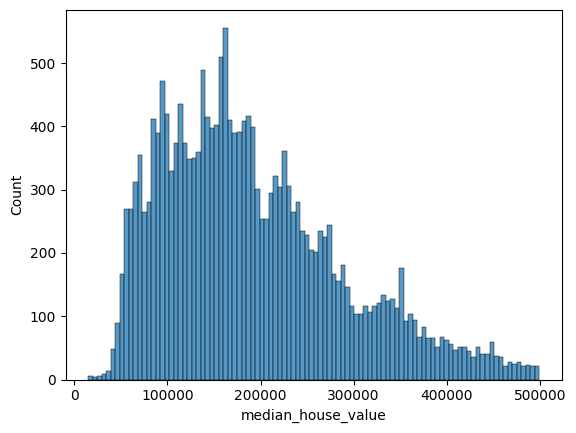

In [2357]:
sns.histplot(df.median_house_value[df.median_house_value < 500000], bins = 100)

In [2358]:
new_features = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
new_df = df[new_features].loc[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] =='INLAND')]
new_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [2359]:
new_df.isna().any() #total_bedrooms  Q1

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [2360]:
median_df = new_df.sort_values(by=['population'])
median_df.reset_index(inplace=True)
median_df.iloc[int((median_df.shape[0]+1)/2)].population  #1195 Q2

1195.0

In [2361]:
new_df.population.median() #1195 Q2

1195.0

In [2362]:
n = len(new_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)
n_train

9413

In [2363]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [2364]:
#np.random.seed(2)
#np.random.shuffle(idx)

In [2365]:
df_train = new_df.iloc[idx[:n_train]]
df_val = new_df.iloc[idx[n_train:n_train+n_val]]
df_test = new_df.iloc[idx[-n_val:]]
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
11480,33.72,-118.03,24.0,5203.0,957.0,2465.0,946.0,5.1630,261000.0
11481,33.72,-118.04,24.0,7141.0,1330.0,3418.0,1268.0,4.6649,237800.0
11482,33.73,-117.99,24.0,2104.0,421.0,1181.0,414.0,3.8365,250900.0
11483,33.73,-118.00,26.0,2236.0,280.0,809.0,282.0,6.7395,342800.0


In [2366]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<Axes: ylabel='Count'>

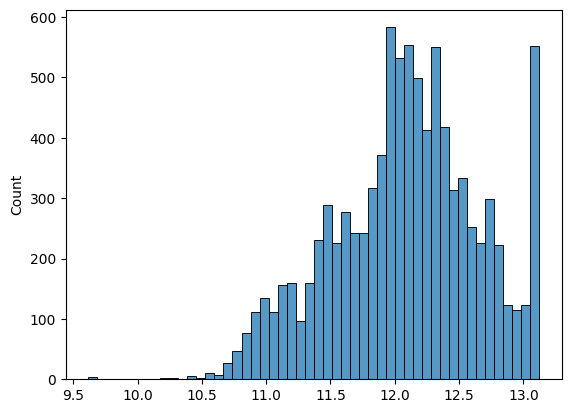

In [2367]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
sns.histplot(y_train, bins = 50)

In [2368]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [2369]:
mean_bedrooms = df_train['total_bedrooms'].mean()
X1_train = df_train.fillna(0).values
X2_train = df_train.fillna(mean_bedrooms).values
X_val = df_val.fillna(0).values

In [2370]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [2371]:
def rmse(y, y_train):
    error = y - y_train
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [2372]:
w0, w = train_linear_regression(X1_train, y_train) #rmse = 0,34(Q3)
y_pred = w0 + X1_train.dot(w)
rmse(y_pred, y_train)

0.3504870582367868

In [2373]:
w0, w = train_linear_regression(X2_train, y_train) #rmse = 0,34(Q3)
y_pred = w0 + X2_train.dot(w)
rmse(y_pred, y_train)


0.3500106993914695

**Далее обучение с регуляризацией**

In [2374]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [2375]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]: #Q4 -
    w0, w = train_linear_regression_reg(X1_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 -6.044513135309425 0.3541521928964681
1e-06 -6.04449205359494 0.3541522297083626
0.0001 -6.042405725478017 0.35415587419712913
0.001 -6.023504924682378 0.3541889235221091
0.01 -5.840799622928133 0.35451143722481643
0.1 -4.481271200670114 0.3570829611239889
1 -1.3448326655052103 0.3641340990390023
5 -0.3247485990621551 0.36671326113424235
10 -0.1652343746994616 0.3670819414816392


In [2376]:

def seed_data_prepare(X, idx):
    df_train = X.iloc[idx[:n_train]]
    df_val = X.iloc[idx[n_train:n_train+n_val]]
    df_test = X.iloc[idx[-n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    df_test = df_test.fillna(0)
    return df_train, df_val, df_test, y_train, y_val, y_test

In [2377]:
w0, w = train_linear_regression(X1_train, y_train) #rmse = 0,34(Q3)
y_pred = w0 + X1_train.dot(w)
rmse(y_pred, y_train)

0.3504870582367868

In [2378]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ans = []
for seed in seeds:
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train, df_val, df_test, y_train, y_val, y_test = seed_data_prepare(new_df,idx)
    w0, w = train_linear_regression(df_train, y_train) 
    y_pred = w0 + df_val.dot(w)
    ans.append(rmse(y_pred, y_val))
print(ans)
score = np.array(ans)
std = score.std()
print(std) #Q5 - 0.006

[0.337738716004299, 0.3454820450588151, 0.3322033125376292, 0.3311828091352853, 0.3348023756520161, 0.3334130184710354, 0.33252334834426533, 0.3395291337366835, 0.330807949529748, 0.3483171344748342]
0.005816274776458042


In [2379]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = df_full_train
X_full_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,32.80,-117.05,16.0,1561.0,378.0,574.0,350.0,3.0035
1,33.73,-116.22,38.0,1695.0,352.0,1279.0,305.0,2.1217
2,36.49,-120.22,14.0,1508.0,347.0,1679.0,345.0,2.4786
3,34.15,-118.42,18.0,1880.0,420.0,681.0,333.0,4.3214
4,37.35,-122.04,20.0,2016.0,313.0,767.0,310.0,6.8370
...,...,...,...,...,...,...,...,...
12545,34.02,-118.49,27.0,4725.0,1185.0,1945.0,1177.0,4.1365
12546,34.51,-117.31,18.0,2704.0,698.0,1611.0,597.0,2.0243
12547,33.27,-117.12,11.0,3016.0,601.0,1727.0,541.0,4.9375
12548,34.04,-118.39,45.0,2089.0,312.0,834.0,305.0,7.3028


In [2380]:
y_full_train = np.concatenate([y_train, y_val]) #обучим модель на train+validation

In [2381]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [2382]:
X_test = df_test #Q6 = 0,33
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.33783571854906724